In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv")
df1=pd.read_csv("test.csv")
print(df.shape)
print(df1.shape)
df.head(10)

(58592, 44)
(39063, 43)


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,ID00006,1.018709,0.07,0.519231,C6,13051,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,ID00007,0.097992,0.16,0.403846,C7,6112,4,B2,M5,Diesel,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,ID00008,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,ID00009,0.282394,0.07,0.298077,C7,6112,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,ID00010,0.566255,0.04,0.442308,C9,17804,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


In [3]:
df["policy_tenure"].nunique()

58591

In [4]:
pid=df1["policy_id"]

In [5]:
df=df.drop(columns="policy_id")
df1=df1.drop(columns="policy_id")

In [6]:
df["is_claim"].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [7]:
# df["age_of_car"].value_counts()
df.dtypes

policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object
gear_box                        

In [8]:
df.isnull().sum()

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

In [9]:
c=0
num_cols=[]
for i in df:
    if df[i].dtype!="object":
        c+=1
        num_cols.append(i)
        print(i)
print(c)

policy_tenure
age_of_car
age_of_policyholder
population_density
make
airbags
displacement
cylinder
gear_box
turning_radius
length
width
height
gross_weight
ncap_rating
is_claim
16


In [10]:
for i in df.columns[df.dtypes=="object"]:
    df[i]=le.fit_transform(df[i])

In [11]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split,cross_val_score
xt,xe,yt,ye=train_test_split(x,y,test_size=0.3,random_state=42)
xt.shape,xe.shape,yt.shape,ye.shape

((41014, 42), (17578, 42), (41014,), (17578,))

In [13]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score,precision_score,recall_score

# Base Model

# Train data

In [14]:
def classify(model,x,y):
    model.fit(xt,yt)
    global p
    p=model.predict(xe)
    cf=confusion_matrix(ye,p)
    print("Confusion_matrix")
    print(cf)
    ac=cf.diagonal().sum()/cf.sum()*100
    return ac

# LogisticRegression

In [15]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg_ac=classify(lg,x,y)
print("Accuracy")
print(lg_ac)
a=f1_score(ye,p)
b=recall_score(ye,p)
c=precision_score(ye,p)
print(f"F1-score - {a}\nRecall - {b}\nPrecision - {c}")

Confusion_matrix
[[16417     0]
 [ 1161     0]]
Accuracy
93.39515303219935
F1-score - 0.0
Recall - 0.0
Precision - 0.0


In [16]:
print(classification_report(ye,p))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     16417
           1       0.00      0.00      0.00      1161

    accuracy                           0.93     17578
   macro avg       0.47      0.50      0.48     17578
weighted avg       0.87      0.93      0.90     17578



# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_ac=classify(dt,x,y)
print("Accuracy")
print(dt_ac)
print(f1_score(ye,p))
print(accuracy_score(ye,p))
a1=f1_score(ye,p)
b1=recall_score(ye,p)
c1=precision_score(ye,p)
print(f"F1-score - {a1}\nRecall - {b1}\nPrecision - {c1}")

Confusion_matrix
[[15174  1243]
 [ 1042   119]]
Accuracy
87.00079645010808
0.09433214427269125
0.8700079645010809
F1-score - 0.09433214427269125
Recall - 0.1024978466838932
Precision - 0.08737151248164464


In [18]:
print(classification_report(ye,p))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     16417
           1       0.09      0.10      0.09      1161

    accuracy                           0.87     17578
   macro avg       0.51      0.51      0.51     17578
weighted avg       0.88      0.87      0.87     17578



# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_ac=classify(rf,x,y)
print("Accuracy")
print(rf_ac)
print(f1_score(ye,p))
print(accuracy_score(ye,p))
a2=f1_score(ye,p)
b2=recall_score(ye,p)
c2=precision_score(ye,p)
print(f"F1-score - {a2}\nRecall - {b2}\nPrecision - {c2}")

Confusion_matrix
[[16344    73]
 [ 1150    11]]
Accuracy
93.0424394129025
0.017670682730923697
0.9304243941290249
F1-score - 0.017670682730923697
Recall - 0.009474590869939707
Precision - 0.13095238095238096


In [20]:
print(classification_report(ye,p))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     16417
           1       0.13      0.01      0.02      1161

    accuracy                           0.93     17578
   macro avg       0.53      0.50      0.49     17578
weighted avg       0.88      0.93      0.90     17578



# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn_ac=classify(knn,x,y)
print("Accuracy")
print(knn_ac)
print(f1_score(ye,p))
print(accuracy_score(ye,p))
a3=f1_score(ye,p)
b3=recall_score(ye,p)
c3=precision_score(ye,p)
print(f"F1-score - {a3}\nRecall - {b3}\nPrecision - {c3}")

Confusion_matrix
[[16367    50]
 [ 1155     6]]
Accuracy
93.14484014108545
0.009860312243221035
0.9314484014108545
F1-score - 0.009860312243221035
Recall - 0.00516795865633075
Precision - 0.10714285714285714


In [22]:
print(classification_report(ye,p))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     16417
           1       0.11      0.01      0.01      1161

    accuracy                           0.93     17578
   macro avg       0.52      0.50      0.49     17578
weighted avg       0.88      0.93      0.90     17578



# SVM

In [23]:
# from sklearn.svm import SVC
# svm=SVC()
# svm_ac=classify(svm,x,y)
# print("Accuracy")
# print(svm_ac)
# print(f1_score(ye,p))

In [24]:
# print(classification_report(ye,p))

# Navive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb_ac=classify(nb,x,y)
print("Accuracy")
print(nb_ac)
print(f1_score(ye,p))
print(accuracy_score(ye,p))
a4=f1_score(ye,p)
b4=recall_score(ye,p)
c4=precision_score(ye,p)
print(f"F1-score - {a4}\nRecall - {b4}\nPrecision - {c4}")

Confusion_matrix
[[6433 9984]
 [ 425  736]]
Accuracy
40.78393446353396
0.12389529500883764
0.4078393446353396
F1-score - 0.12389529500883764
Recall - 0.6339362618432386
Precision - 0.06865671641791045


In [26]:
print(classification_report(ye,p))

              precision    recall  f1-score   support

           0       0.94      0.39      0.55     16417
           1       0.07      0.63      0.12      1161

    accuracy                           0.41     17578
   macro avg       0.50      0.51      0.34     17578
weighted avg       0.88      0.41      0.52     17578



# XGB

In [27]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb_ac=classify(xgb,x,y)
print("Accuracy")
print(xgb_ac)
print(f1_score(ye,p))
print(accuracy_score(ye,p))
a5=f1_score(ye,p)
b5=recall_score(ye,p)
c5=precision_score(ye,p)
print(f"F1-score - {a5}\nRecall - {b5}\nPrecision - {c5}")

Confusion_matrix
[[16411     6]
 [ 1161     0]]
Accuracy
93.36101945613835
0.0
0.9336101945613835
F1-score - 0.0
Recall - 0.0
Precision - 0.0


In [28]:
print(classification_report(ye,p))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     16417
           1       0.00      0.00      0.00      1161

    accuracy                           0.93     17578
   macro avg       0.47      0.50      0.48     17578
weighted avg       0.87      0.93      0.90     17578



In [29]:
algo=["logistic","decision tree","Random Forest","KNN","Naive Bayes","XGB"]
accuracy=[lg_ac,dt_ac,rf_ac,knn_ac,nb_ac,xgb_ac]
m=[a,a1,a2,a3,a4,a5]
precision=[c,c1,c2,c3,c4,c5]
recall=[b,b1,b2,b3,b4,b5]

In [30]:
basic=pd.DataFrame({"Algorithm":algo,"Accuracy":accuracy,"F1-score":m,"Precision":precision,"Recall":recall})
basic

,Algorithm,Accuracy,F1-score,Precision,Recall
0,logistic,93.395153,0.000000,0.000000,0.000000
1,decision tree,87.000796,0.094332,0.087372,0.102498
2,Random Forest,93.042439,0.017671,0.130952,0.009475
3,KNN,93.144840,0.009860,0.107143,0.005168
4,Naive Bayes,40.783934,0.123895,0.068657,0.633936
5,XGB,93.361019,0.000000,0.000000,0.000000


# Class Imbalance Techniques
# ----------------------------------------

# SMOTE Over Sampling

In [31]:
yt.value_counts()

0    38427
1     2587
Name: is_claim, dtype: int64

<Axes: xlabel='count', ylabel='is_claim'>

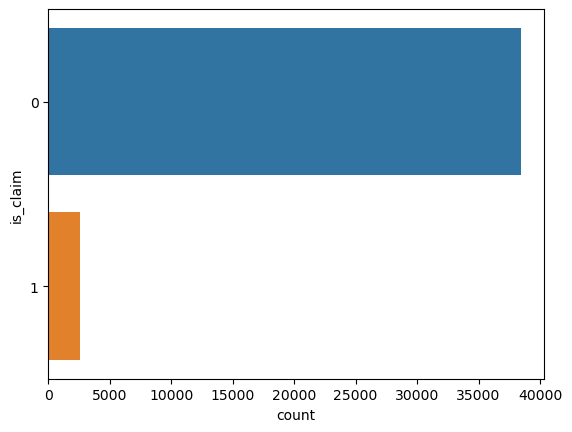

In [32]:
sns.countplot(y=yt,data=df)

In [33]:
from imblearn.over_sampling import SMOTE
over=SMOTE()
x_smote,y_smote=over.fit_resample(xt,yt)

In [34]:
y_smote.value_counts()

1    38427
0    38427
Name: is_claim, dtype: int64

In [35]:
sm_data=pd.concat([x_smote,y_smote],axis=1)
sm_data.shape

(76854, 43)

<Axes: xlabel='count', ylabel='is_claim'>

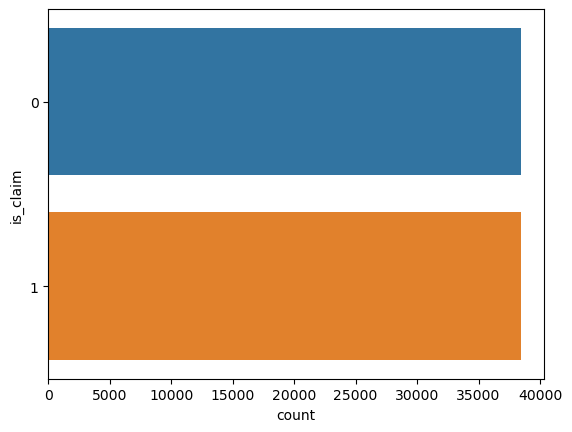

In [36]:
sns.countplot(y=y_smote,data=sm_data)

## outlier treatment

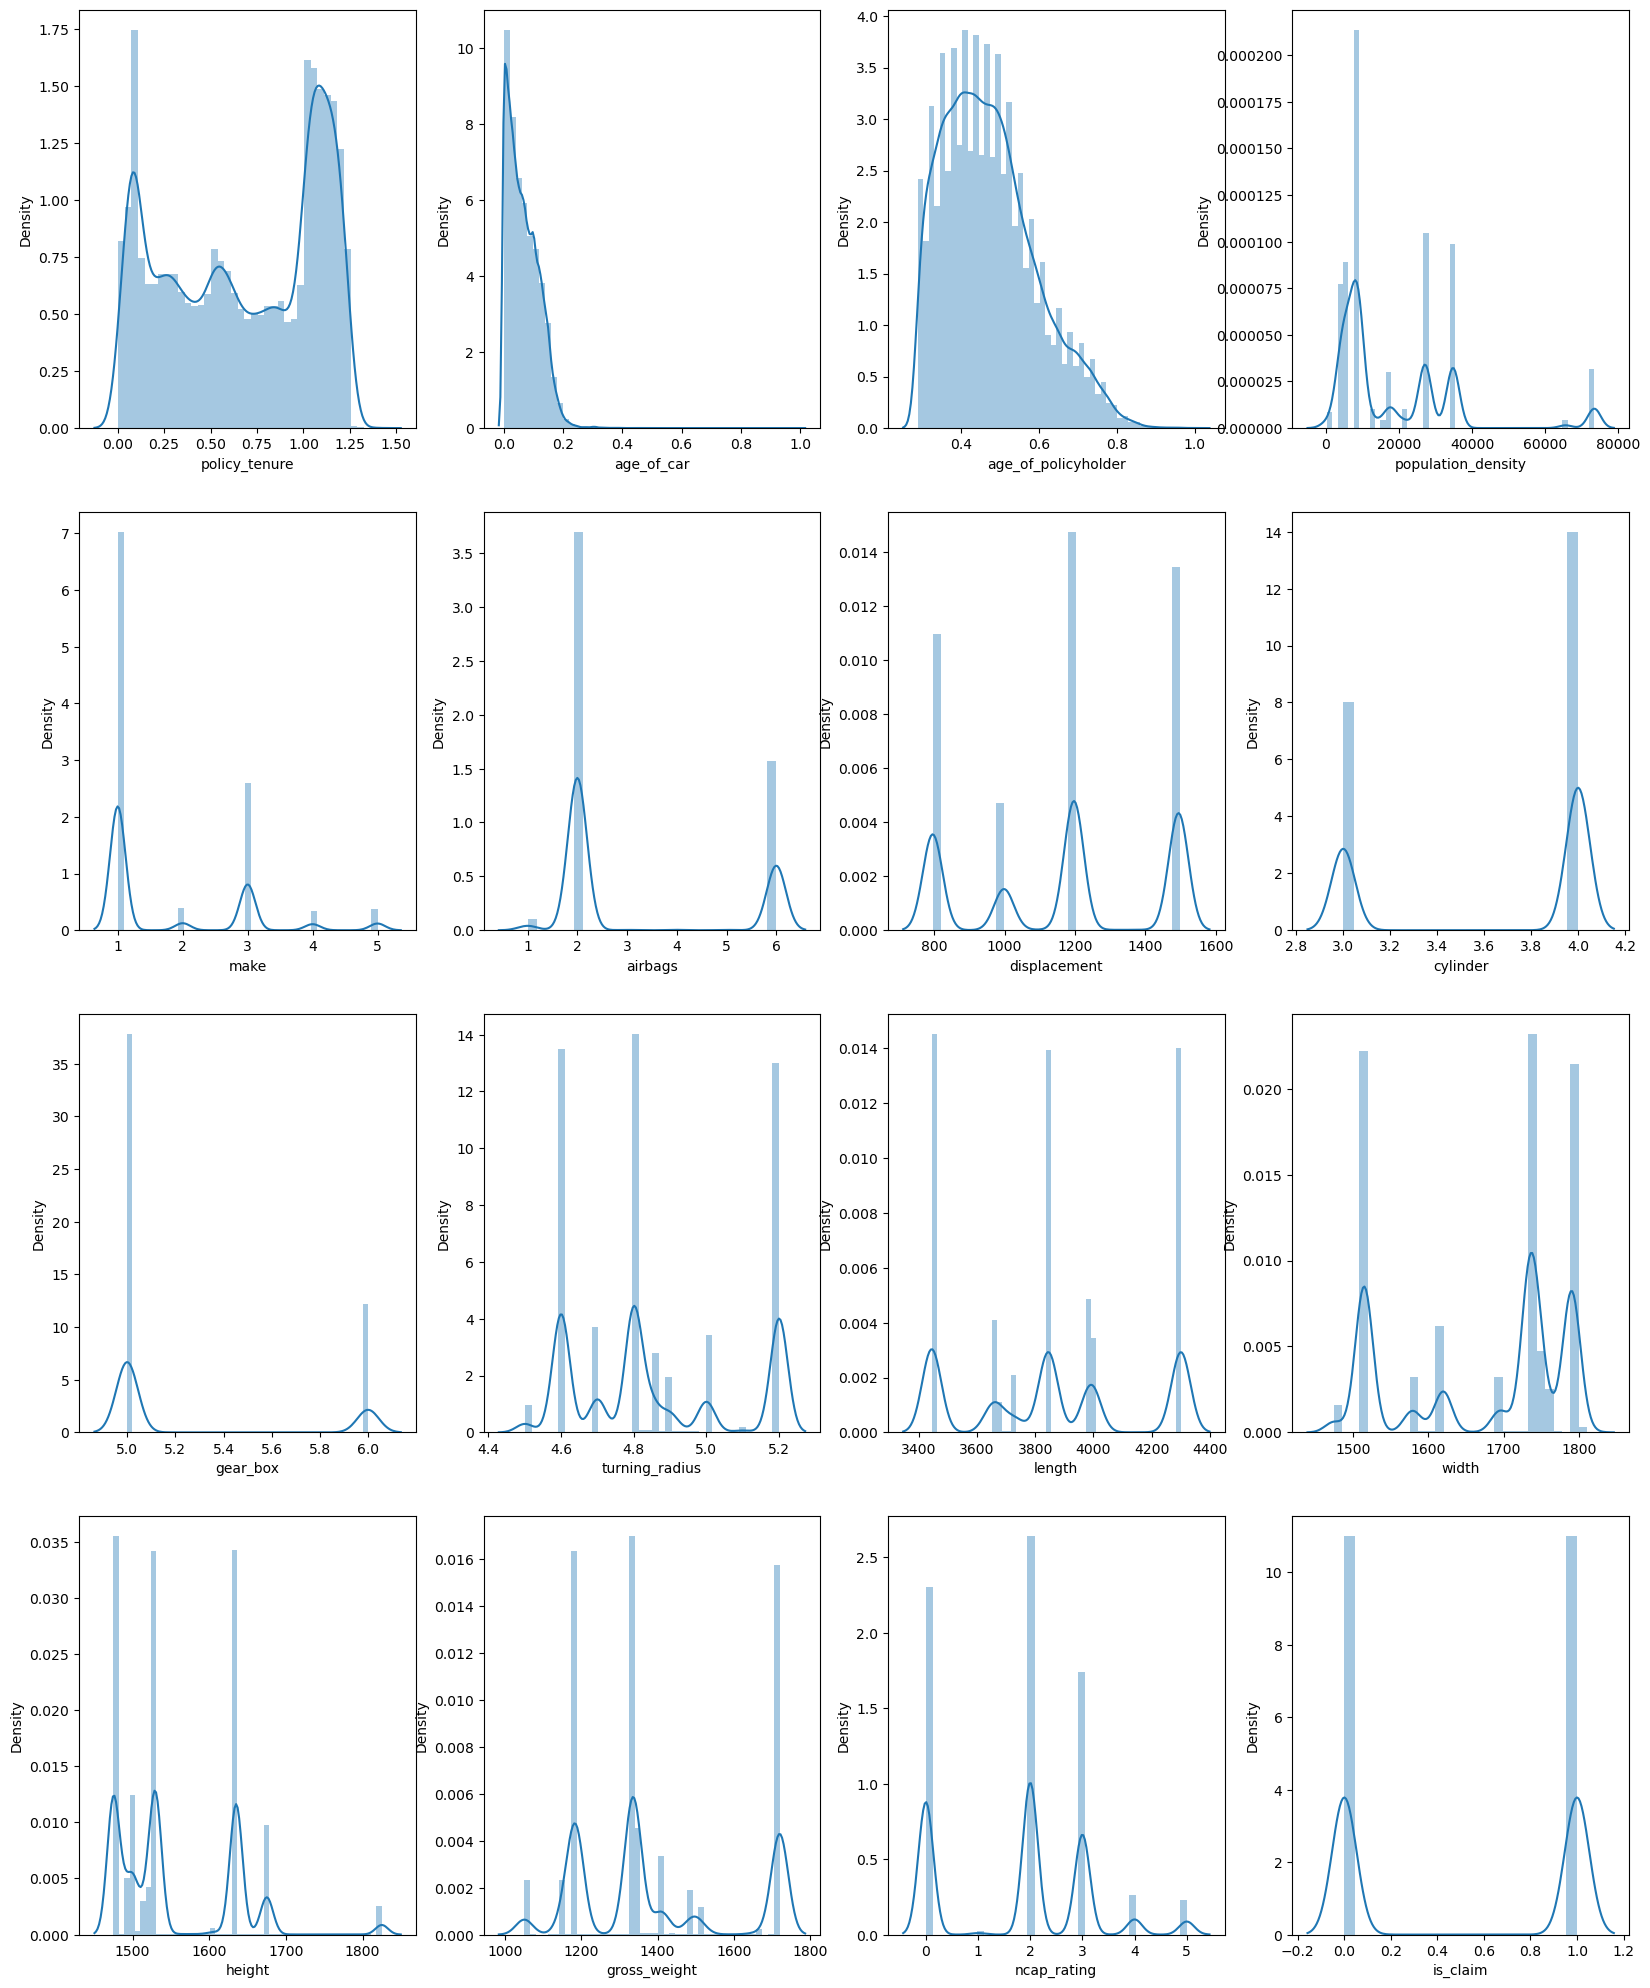

In [37]:
fig,ax=plt.subplots(4,4,figsize=(20,25))
index=0
ax=ax.flatten()
for i in sm_data:
    if i in num_cols:
        sns.distplot(sm_data[i],ax=ax[index])
        index+=1
plt.show()

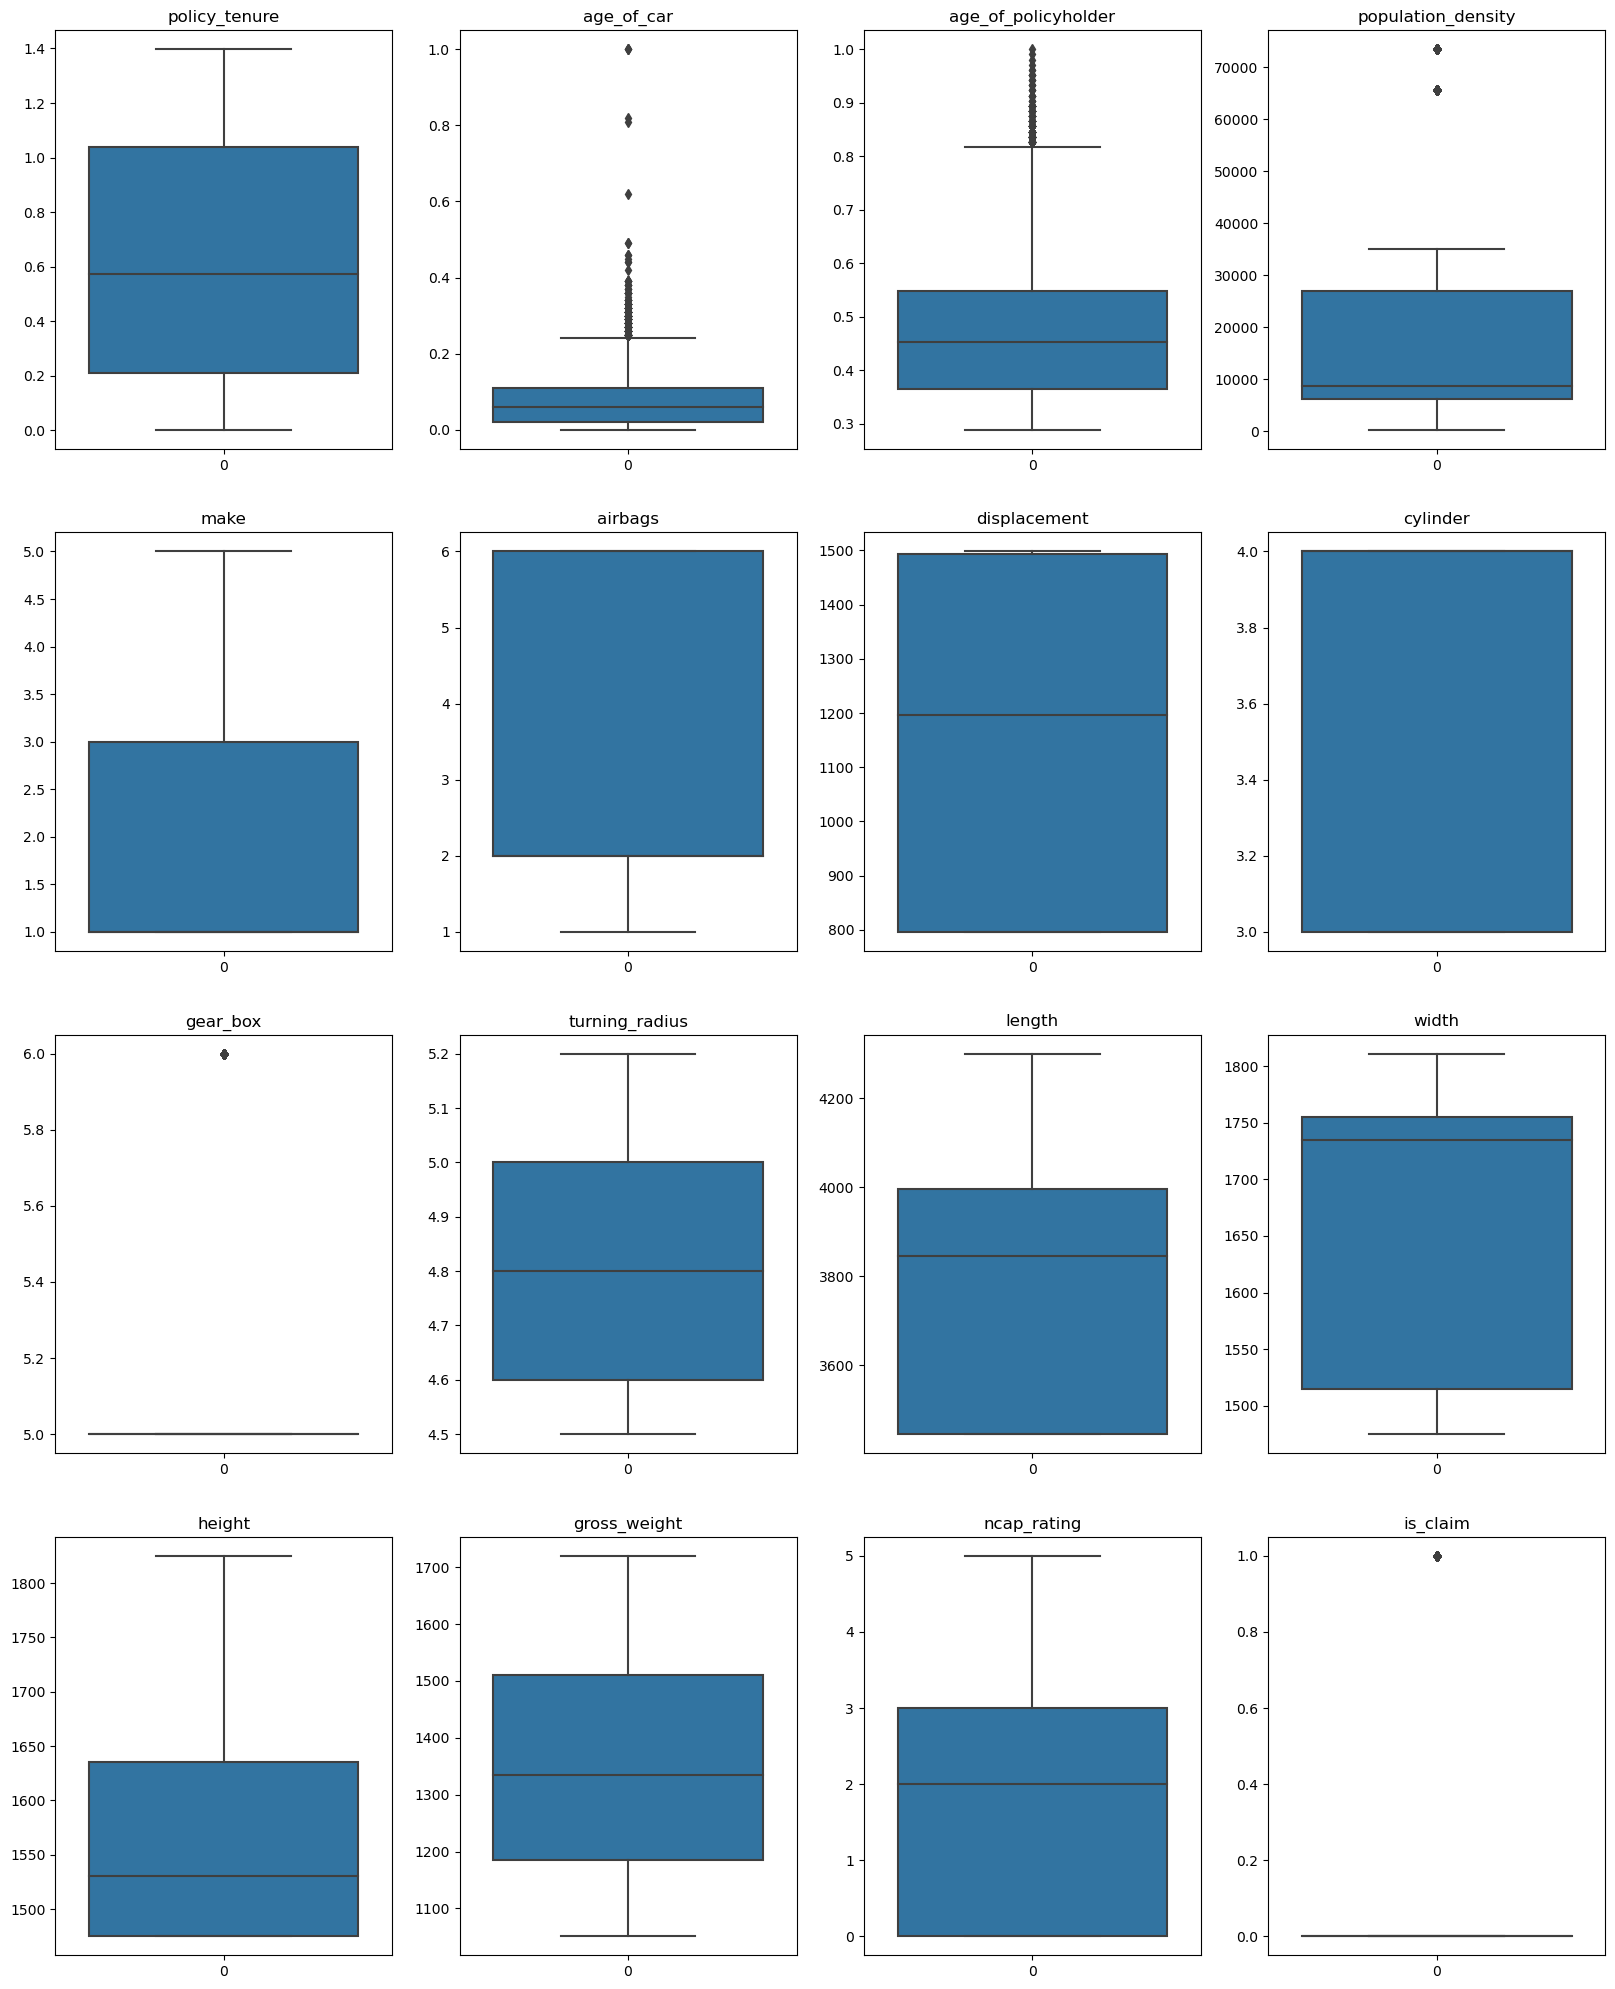

In [38]:
fig,ax=plt.subplots(4,4,figsize=(20,25))
index=0
ax=ax.flatten()
for i in df:
    if i in num_cols:
        sns.boxplot(df[i],ax=ax[index])
        ax[index].set_title(i)
        index+=1
plt.show()

In [39]:
for i in sm_data:
    if i in num_cols:
        print(i)
        print(sm_data[i].skew())
        print()

policy_tenure
-0.19254026893296058

age_of_car
1.0273892055170866

age_of_policyholder
0.6533518976970965

population_density
1.7175162178036005

make
1.1998731279044001

airbags
0.8885864239268895

displacement
-0.13225566605798642

cylinder
-0.566718690142585

gear_box
1.1979999889969246

turning_radius
0.42655142157959647

length
0.12242334544541218

width
-0.5354752192808283

height
1.0101878081303182

gross_weight
0.5451229894303842

ncap_rating
0.06518210079960082

is_claim
0.0



In [40]:
num_col1=["policy_tenure","age_of_car","age_of_policyholder","population_density","turning_radius","length","width","height","gross_weight"]
num_col1

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight']

In [41]:
# make,airbags,cylinder,make,gear_box,displacement,ncap_rating,is_claim-categorical

## IQR

In [42]:
for i in sm_data:
    if i in ["age_of_car", "population_density","height"]:
        print(i)
        print("Skew Before",sm_data[i].skew())
        IQR = sm_data[i].quantile(0.75) - sm_data[i].quantile(0.25)
        print("IQR =", IQR)
        ub = sm_data[i].quantile(0.75) + 3 * IQR
        lb = sm_data[i].quantile(0.25) - 3 * IQR
        print("Upper boundary =", ub)
        print("Lower boundary =", lb)

        # Update values outside the boundaries
        sm_data[i]=np.where(sm_data[i]>ub,ub,
                        np.where(sm_data[i]<lb,lb,
                                sm_data[i]))
        print("Skew After",sm_data[i].skew())
        print()
#         data.loc[data[i] > ub, i] = ub
#         data.loc[data[i] < lb, i] = lb


age_of_car
Skew Before 1.0273892055170866
IQR = 0.08
Upper boundary = 0.33999999999999997
Lower boundary = -0.22
Skew After 0.7543546724610746

population_density
Skew Before 1.7175162178036005
IQR = 20891.0
Upper boundary = 89676.0
Lower boundary = -56561.0
Skew After 1.7175162178036005

height
Skew Before 1.0101878081303182
IQR = 145.0
Upper boundary = 2070.0
Lower boundary = 1055.0
Skew After 1.0101878081303182



## normal distribution

In [43]:
norm=["policy_tenure","age_of_policyholder","turning_radius","length","width","gross_weight"]
for i in sm_data:
    if i in norm:
        ub=sm_data[i].mean()+3*sm_data[i].std()
        lb=sm_data[i].mean()-3*sm_data[i].std()
        sm_data[i]=np.where(sm_data[i]>ub,ub,
                            np.where(sm_data[i]<lb,lb,
                                    sm_data[i]))

In [44]:
for i in num_col1:
    print(i)
    print(sm_data[i].skew())
    print()

policy_tenure
-0.19254026893296058

age_of_car
0.7543546724610746

age_of_policyholder
0.6330799297554228

population_density
1.7175162178036005

turning_radius
0.42655142157959647

length
0.12242334544541218

width
-0.5354752192808283

height
1.0101878081303182

gross_weight
0.5451229894303842



In [45]:
a=sm_data[["population_density","height"]]
print(a.skew())
b=np.sqrt(a)
print(b.skew())

population_density    1.717516
height                1.010188
dtype: float64
population_density    0.858477
height                0.953501
dtype: float64


In [46]:
sm_data["population_density"]=np.sqrt(sm_data["population_density"])
sm_data["height"]=np.sqrt(sm_data["height"])

In [47]:
for i in num_col1:
    print(i)
    print(sm_data[i].skew())
    print()

policy_tenure
-0.19254026893296058

age_of_car
0.7543546724610746

age_of_policyholder
0.6330799297554228

population_density
0.8584766298620374

turning_radius
0.42655142157959647

length
0.12242334544541218

width
-0.5354752192808283

height
0.9535010366222816

gross_weight
0.5451229894303842



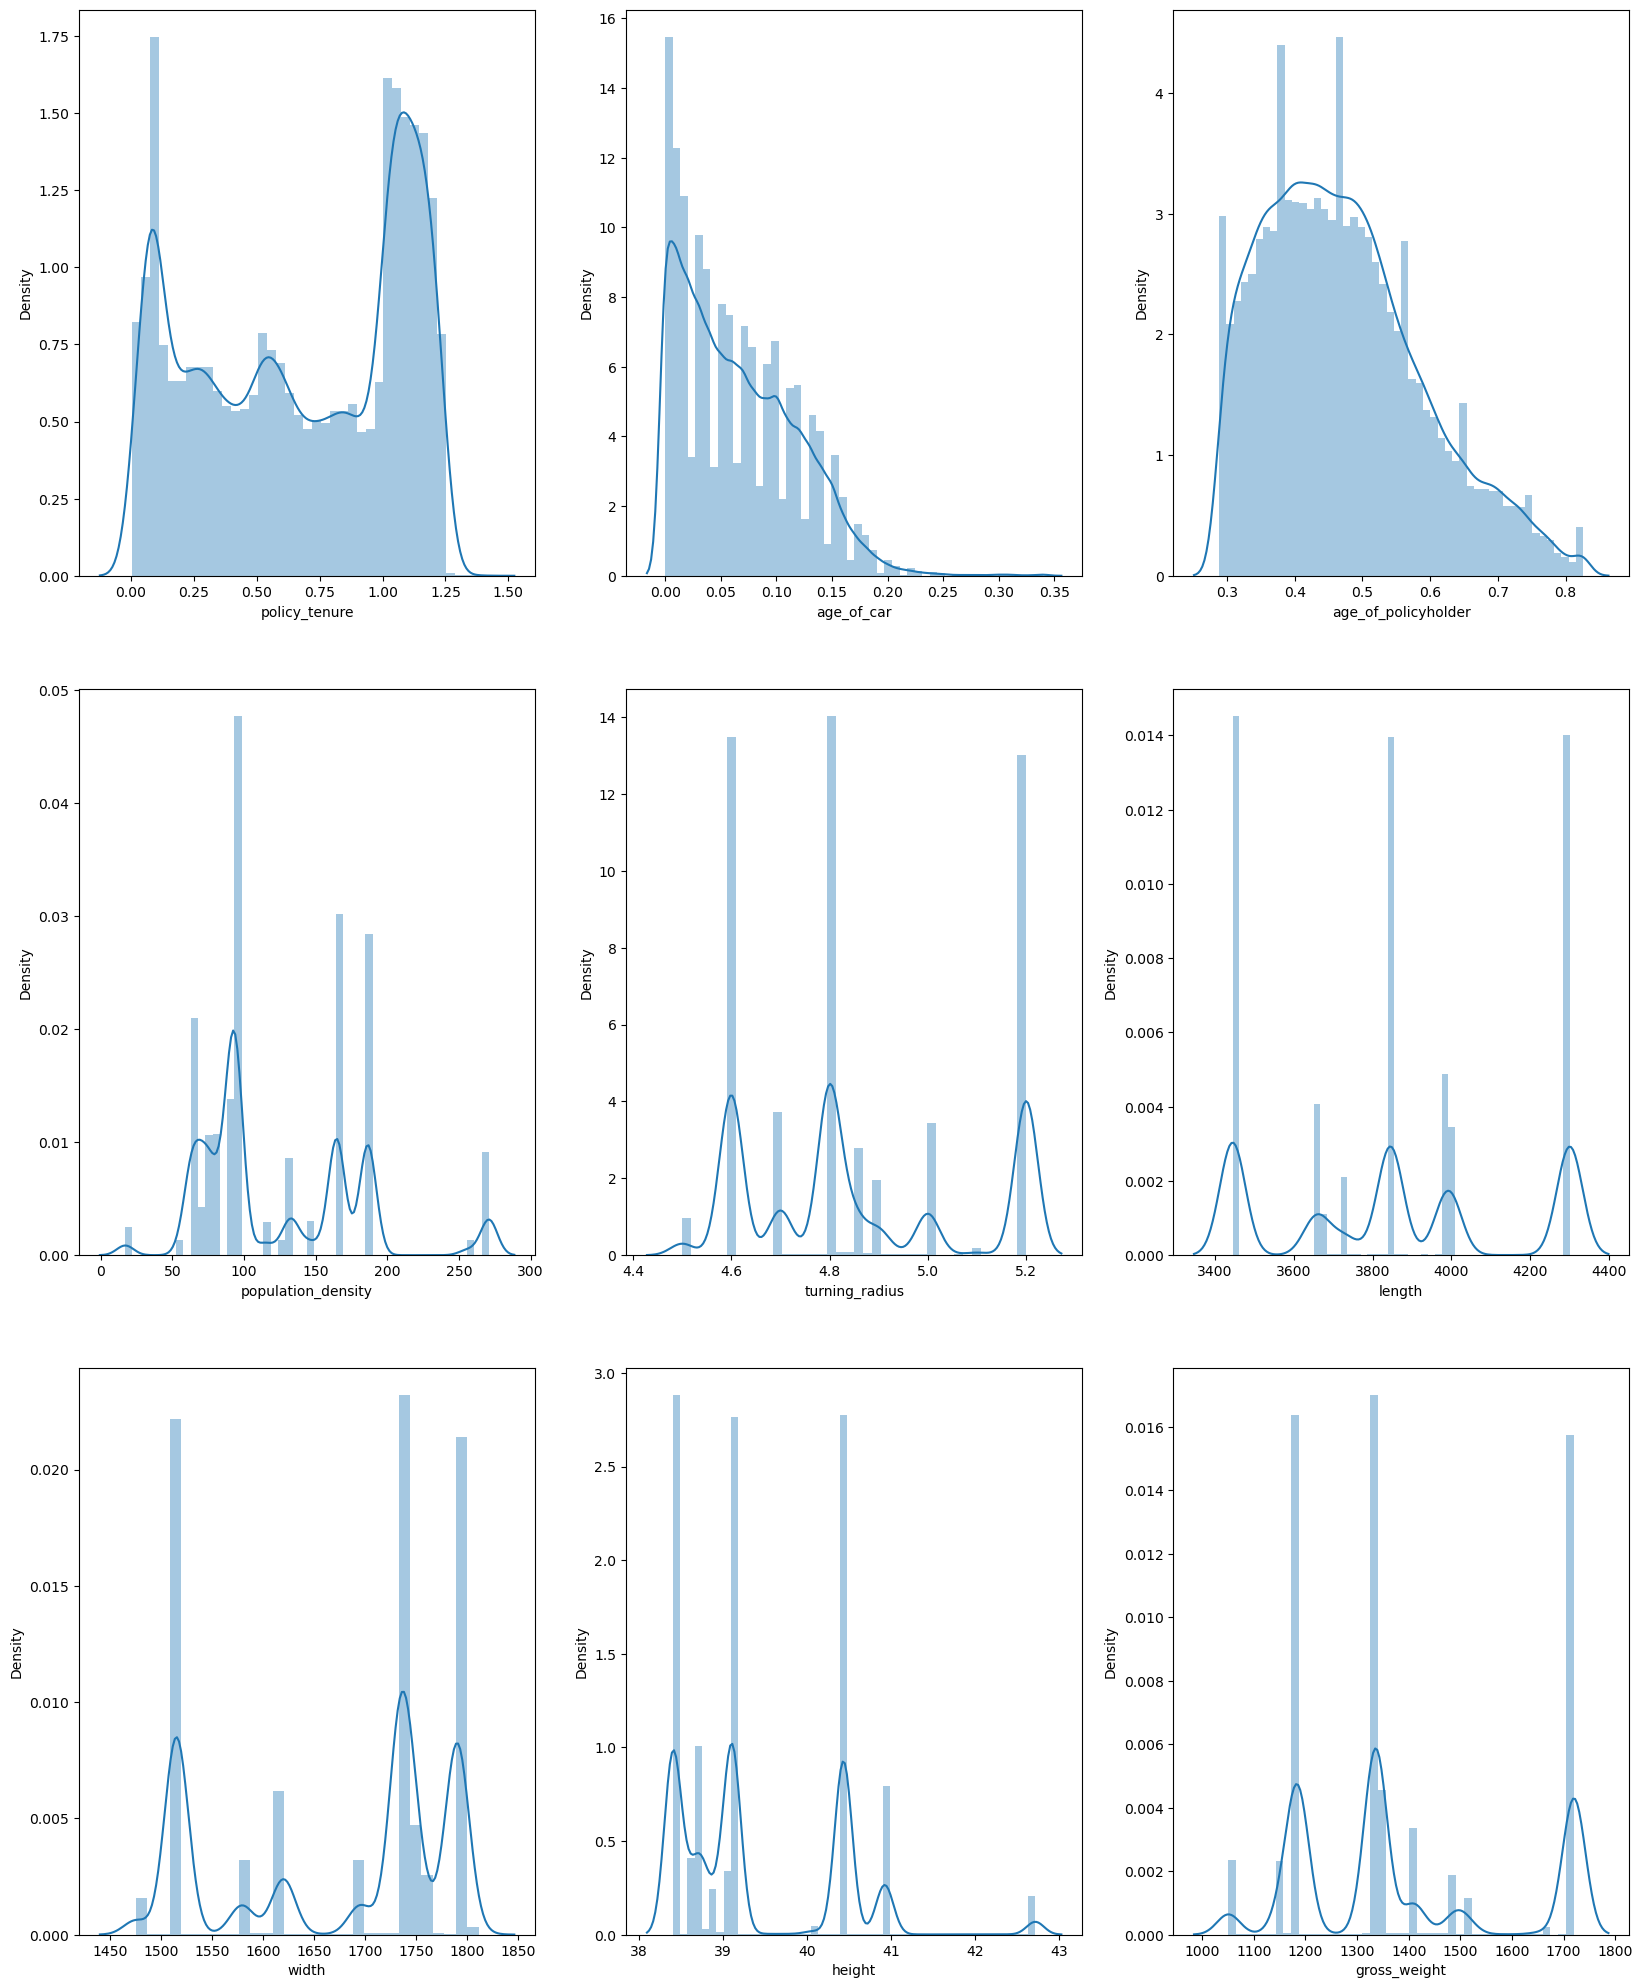

In [48]:
fig,ax=plt.subplots(3,3,figsize=(20,25))
index=0
ax=ax.flatten()
for i in sm_data:
    if i in num_col1:
        sns.distplot(sm_data[i],ax=ax[index])
        index+=1
plt.show()

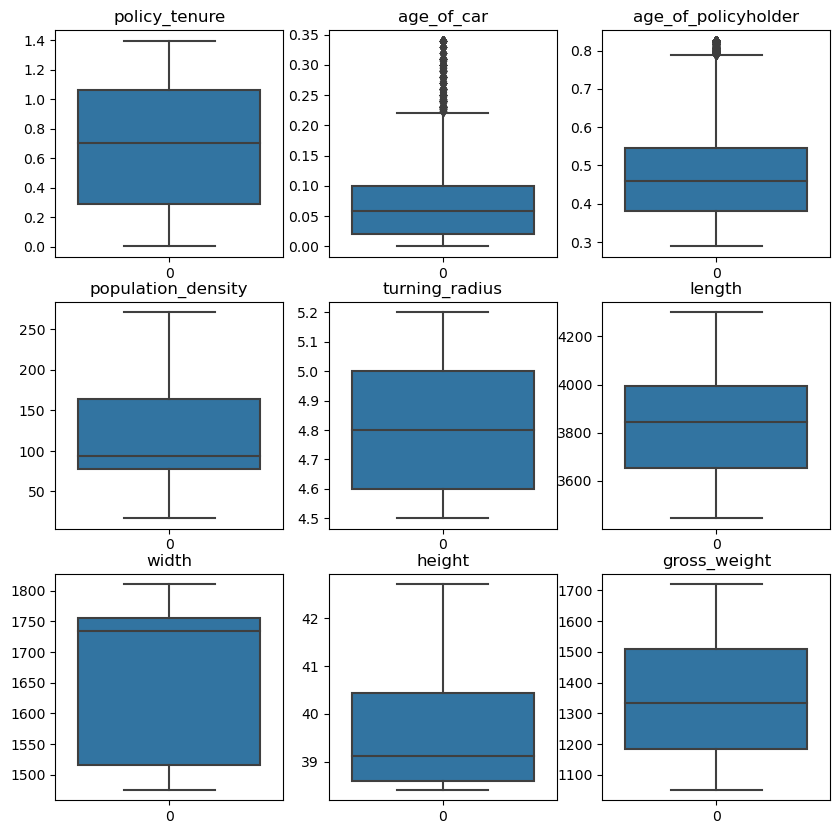

In [49]:
fig,ax=plt.subplots(3,3,figsize=(10,10))
index=0
ax=ax.flatten()
for i in sm_data:
    if i in num_col1:
        sns.boxplot(sm_data[i],ax=ax[index])
        ax[index].set_title(i)
        index+=1
plt.show()

In [50]:
sm_data.shape

(76854, 43)

In [51]:
x_smote=sm_data.iloc[:,:-1]
y_smote=sm_data.iloc[:,-1]

In [52]:
xtr8,xte8,ytr8,yte8=train_test_split(x_smote,y_smote,test_size=0.2,random_state=100)
xtr8.shape,xte8.shape,ytr8.shape,yte8.shape

((61483, 42), (15371, 42), (61483,), (15371,))

In [53]:
l=[lg,dt,rf,knn,nb,xgb]
l1=[]
f1=[]
precision=[]
recall=[]

for i in l:
    i.fit(x_smote,y_smote)
    print(i.__class__.__name__)
    pre=i.predict(xte8)
    cff1=confusion_matrix(yte8,pre)
    print(cff1)
    acc1=cff1.diagonal().sum()/cff1.sum()*100
    print(acc1)
    precision.append(precision_score(yte8,pre))
    recall.append(recall_score(yte8,pre))
    print()
    print(classification_report(yte8,pre))
    l1.append(acc1)
    f1score=f1_score(yte8,pre)
    f1.append(f1score)

LogisticRegression
[[3905 3728]
 [3408 4330]]
53.57491379871186

              precision    recall  f1-score   support

           0       0.53      0.51      0.52      7633
           1       0.54      0.56      0.55      7738

    accuracy                           0.54     15371
   macro avg       0.54      0.54      0.54     15371
weighted avg       0.54      0.54      0.54     15371

DecisionTreeClassifier
[[7633    0]
 [   0 7738]]
100.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7633
           1       1.00      1.00      1.00      7738

    accuracy                           1.00     15371
   macro avg       1.00      1.00      1.00     15371
weighted avg       1.00      1.00      1.00     15371

RandomForestClassifier
[[7633    0]
 [   0 7738]]
100.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7633
           1       1.00      1.00      1.00      7738

   

In [54]:
algo=["logistic","decision tree","Random Forest","KNN","Naive Bayes","XGB"]
basic=pd.DataFrame({"Algorithm":algo,"Accuracy":l1,"F1-score":f1,"Precision":precision,"Recall":recall})
basic

,Algorithm,Accuracy,F1-score,Precision,Recall
0,logistic,53.574914,0.548240,0.537354,0.559576
1,decision tree,100.000000,1.000000,1.000000,1.000000
2,Random Forest,100.000000,1.000000,1.000000,1.000000
3,KNN,87.339796,0.883751,0.821706,0.955932
4,Naive Bayes,51.473554,0.521091,0.517800,0.524425
5,XGB,94.548175,0.943117,0.993280,0.897777


# Imb learn over sampler

In [55]:
from imblearn.over_sampling import RandomOverSampler
r=RandomOverSampler()
x_imb,y_imb=over.fit_resample(xt,yt)
imb_data=pd.concat([x_imb,y_imb],axis=1)
imb_data.shape

(76854, 43)

In [56]:
yt.value_counts()

0    38427
1     2587
Name: is_claim, dtype: int64

In [57]:
y_imb.value_counts()

1    38427
0    38427
Name: is_claim, dtype: int64

## IQR

In [58]:
for i in imb_data:
    if i in ["age_of_car", "population_density"]:
        print(i)
        print("Skew Before",sm_data[i].skew())
        IQR = imb_data[i].quantile(0.75) - imb_data[i].quantile(0.25)
        print("IQR =", IQR)
        ub = imb_data[i].quantile(0.75) + 3 * IQR
        lb = imb_data[i].quantile(0.25) - 3 * IQR
        print("Upper boundary =", ub)
        print("Lower boundary =", lb)

        # Update values outside the boundaries
        imb_data[i]=np.where(imb_data[i]>ub,ub,
                        np.where(imb_data[i]<lb,lb,
                                imb_data[i]))
        print("Skew After",imb_data[i].skew())

age_of_car
Skew Before 0.7543546724610746
IQR = 0.08
Upper boundary = 0.33999999999999997
Lower boundary = -0.22
Skew After 0.7652216408409146
population_density
Skew Before 0.8584766298620374
IQR = 20891.0
Upper boundary = 89676.0
Lower boundary = -56561.0
Skew After 1.7360691359654983


## normal_distribution

In [59]:
norm=["policy_tenure","age_of_policyholder","turning_radius","length","width","gross_weight"]
for i in imb_data:
    if i in norm:
        ub=imb_data[i].mean()+3*imb_data[i].std()
        lb=imb_data[i].mean()-3*imb_data[i].std()
        imb_data[i]=np.where(imb_data[i]>ub,ub,
                            np.where(imb_data[i]<lb,lb,
                                    imb_data[i]))

In [60]:
for i in num_col1:
    print(i)
    print(imb_data[i].skew())
    print()

policy_tenure
-0.19292896102508253

age_of_car
0.7652216408409146

age_of_policyholder
0.6284048022929233

population_density
1.7360691359654983

turning_radius
0.4306220107895902

length
0.12390240000612747

width
-0.5364534336438868

height
1.0068396807279703

gross_weight
0.5468025397084307



In [61]:
a=imb_data[["population_density","height"]]
print(a.skew())
b=np.sqrt(a)
print(b.skew())
imb_data["population_density"]=np.sqrt(imb_data["population_density"])
imb_data["height"]=np.sqrt(imb_data["height"])

population_density    1.736069
height                1.006840
dtype: float64
population_density    0.873485
height                0.950073
dtype: float64


In [62]:
for i in num_col1:
    print(i)
    print(imb_data[i].skew())
    print()

policy_tenure
-0.19292896102508253

age_of_car
0.7652216408409146

age_of_policyholder
0.6284048022929233

population_density
0.8734846577481977

turning_radius
0.4306220107895902

length
0.12390240000612747

width
-0.5364534336438868

height
0.9500726515222521

gross_weight
0.5468025397084307



In [63]:
x_imb=imb_data.iloc[:,:-1]
y_imb=imb_data.iloc[:,-1]

In [64]:
xtr7,xte7,ytr7,yte7=train_test_split(x_imb,y_imb,test_size=0.2,random_state=100)
xtr7.shape,xte7.shape,ytr7.shape,yte7.shape

((61483, 42), (15371, 42), (61483,), (15371,))

In [65]:
l=[lg,dt,rf,knn,nb,xgb]
l1=[]
f1=[]
precision=[]
recall=[]
for i in l:
    i.fit(x_imb,y_imb)
    print(i.__class__.__name__)
    pre=i.predict(xte7)
    cff1=confusion_matrix(yte7,pre)
    print(cff1)
    acc1=cff1.diagonal().sum()/cff1.sum()*100
    print(acc1)
    precision.append(precision_score(yte7,pre))
    recall.append(recall_score(yte7,pre))
    print()
    print(classification_report(yte7,pre))
    l1.append(acc1)
    f1score=f1_score(yte7,pre)
    f1.append(f1score)

LogisticRegression
[[3666 3967]
 [3118 4620]]
53.906707436080936

              precision    recall  f1-score   support

           0       0.54      0.48      0.51      7633
           1       0.54      0.60      0.57      7738

    accuracy                           0.54     15371
   macro avg       0.54      0.54      0.54     15371
weighted avg       0.54      0.54      0.54     15371

DecisionTreeClassifier
[[7633    0]
 [   0 7738]]
100.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7633
           1       1.00      1.00      1.00      7738

    accuracy                           1.00     15371
   macro avg       1.00      1.00      1.00     15371
weighted avg       1.00      1.00      1.00     15371

RandomForestClassifier
[[7633    0]
 [   0 7738]]
100.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7633
           1       1.00      1.00      1.00      7738

  

In [66]:
algo=["logistic","decision tree","Random Forest","KNN","Naive Bayes","XGB"]
basic=pd.DataFrame({"Algorithm":algo,"Accuracy":l1,"F1-score":f1,"Precision":precision,"Recall":recall})
basic

,Algorithm,Accuracy,F1-score,Precision,Recall
0,logistic,53.906707,0.566003,0.538023,0.597054
1,decision tree,100.000000,1.000000,1.000000,1.000000
2,Random Forest,100.000000,1.000000,1.000000,1.000000
3,KNN,87.534968,0.885338,0.824454,0.955932
4,Naive Bayes,51.239347,0.540212,0.514189,0.569010
5,XGB,94.626244,0.943985,0.993151,0.899457


# IMb learn under

In [67]:
# from imblearn.under_sampling import RandomUnderSampler
# u=RandomUnderSampler()
# x_imb_u,y_imb_u=u.fit_resample(xt,yt)

In [68]:
# xtr6,xte6,ytr6,yte6=train_test_split(x_imb_u,y_imb_u,test_size=0.2,random_state=100)
# xtr6.shape,xte6.shape,ytr6.shape,yte6.shape

In [69]:
# l=[lg,dt,rf,knn,nb,xgb]
# l1=[]
# f1=[]
# precision=[]
# recall=[]
# for i in l:
#     i.fit(x_imb_u,y_imb_u)
#     print(i.__class__.__name__)
#     pre=i.predict(xte6)
#     cff1=confusion_matrix(yte6,pre)
#     print(cff1)
#     acc1=cff1.diagonal().sum()/cff1.sum()*100
#     print(acc1)
#     precision.append(precision_score(yte6,pre))
#     recall.append(recall_score(yte6,pre))
#     print()
#     print(classification_report(yte6,pre))
#     l1.append(acc1)
#     f1score=f1_score(yte6,pre)
#     f1.append(f1score)

In [70]:
# algo=["logistic","decision tree","Random Forest","KNN","Naive Bayes","XGB"]
# basic=pd.DataFrame({"Algorithm":algo,"Accuracy":l1,"F1-score":f1,"Precison":precision,"Recall":recall})
# basic

# Feature_selection

# Recursive Feature elimination

In [71]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [72]:
rfe = RFE(estimator=dtree, n_features_to_select=5)

In [73]:
rfe.fit(sm_data.iloc[:,:-1],sm_data.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [74]:
rfe.support_

array([ True,  True,  True, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [75]:
rf1=pd.DataFrame({"feature":list(rfe.support_),"col":list(sm_data.iloc[:,:-1].columns)})
rf1

,feature,col
0,True,policy_tenure
1,True,age_of_car
2,True,age_of_policyholder
3,False,area_cluster
4,True,population_density
5,False,make
6,False,segment
7,True,model
8,False,fuel_type
9,False,max_torque


In [76]:
m=rf1[rf1["feature"]==True]
print(m["col"].to_string(index=False))

      policy_tenure
         age_of_car
age_of_policyholder
 population_density
              model


In [77]:
data2=sm_data[["policy_tenure","age_of_car","age_of_policyholder","population_density","model","is_claim"]]
data2.head(2)

,policy_tenure,age_of_car,age_of_policyholder,population_density,model,is_claim
0,0.975712,0.07,0.384615,93.776330,7,1
1,0.509869,0.10,0.576923,270.979704,5,0


In [78]:
data2.to_csv("final.csv")

In [79]:
data2.shape

(76854, 6)

In [80]:
xg=data2.iloc[:,:-1]
yg=data2.iloc[:,-1]

In [81]:
xt4,xte4,yt4,yte4=train_test_split(xg,yg,test_size=0.2)
xt4.shape,xte4.shape,yt4.shape,yte4.shape

((61483, 5), (15371, 5), (61483,), (15371,))

In [82]:
l=[lg,dt,rf,knn,nb,xgb]
l1=[]
f1=[]
precision=[]
recall=[]
for i in l:
    i.fit(xt4,yt4)
    print(i.__class__.__name__)
    pre=i.predict(xte4)
    cff1=confusion_matrix(yte4,pre)
    print(cff1)
    acc1=cff1.diagonal().sum()/cff1.sum()*100
    print(acc1)
    precision.append(precision_score(yte4,pre))
    recall.append(recall_score(yte4,pre))
    print()
    print(classification_report(yte4,pre))
    l1.append(acc1)
    f1score=f1_score(yte4,pre)
    f1.append(f1score)

LogisticRegression
[[4273 3445]
 [2939 4714]]
58.4672435105068

              precision    recall  f1-score   support

           0       0.59      0.55      0.57      7718
           1       0.58      0.62      0.60      7653

    accuracy                           0.58     15371
   macro avg       0.59      0.58      0.58     15371
weighted avg       0.59      0.58      0.58     15371

DecisionTreeClassifier
[[7016  702]
 [ 588 7065]]
91.60757270184114

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      7718
           1       0.91      0.92      0.92      7653

    accuracy                           0.92     15371
   macro avg       0.92      0.92      0.92     15371
weighted avg       0.92      0.92      0.92     15371

RandomForestClassifier
[[7354  364]
 [ 595 7058]]
93.76097846594236

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7718
           1       0.95      0.92  

In [83]:
algo=["logistic","decision tree","Random Forest","KNN","Naive Bayes","XGB"]
basic=pd.DataFrame({"Algorithm":algo,"Accuracy":l1,"F1-score":f1,"Precision":precision,"Recall":recall})
basic

,Algorithm,Accuracy,F1-score,Precision,Recall
0,logistic,58.467244,0.596256,0.577767,0.615968
1,decision tree,91.607573,0.916342,0.909618,0.923167
2,Random Forest,93.760978,0.936385,0.950957,0.922253
3,KNN,80.866567,0.827841,0.749841,0.923951
4,Naive Bayes,54.420662,0.564303,0.538389,0.592839
5,XGB,93.839048,0.934793,0.988064,0.886972


In [84]:
pre=xgb.predict(xte4)

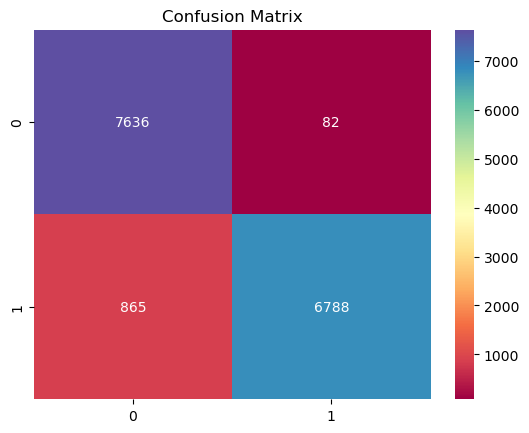

In [85]:
cm=confusion_matrix(yte4,pre)
sns.heatmap(cm,annot=True,fmt="d",cmap="Spectral")
plt.title("Confusion Matrix")
plt.show()

In [86]:
# Hence we conclude as RF as better model

# test_data

In [87]:
for i in df1.columns[df1.dtypes=="object"]:
    df1[i]=le.fit_transform(df1[i])

In [88]:
tes1=df1[["policy_tenure","age_of_car","age_of_policyholder","population_density","model"]]

In [89]:
tes1

,policy_tenure,age_of_car,age_of_policyholder,population_density,model
0,0.341732,0.00,0.586538,4076,0
1,0.307241,0.13,0.442308,8794,7
2,0.327924,0.12,0.451923,8794,4
3,0.782654,0.01,0.461538,34738,0
4,1.233404,0.02,0.634615,34738,0
...,...,...,...,...,...
39058,0.047982,0.15,0.740385,27003,7
39059,1.224838,0.05,0.509615,8794,5
39060,0.520287,0.12,0.355769,13051,8
39061,1.172391,0.08,0.644231,34738,3


In [90]:
# MODEL FOR DT
p1=dt.predict(tes1)
res=pd.DataFrame({"policy_id":pid,"is_claim":p1})
res.to_csv(r"C:\Users\asdad\OneDrive\Desktop\newdemo\Car_policy\basics-files\result.csv",index=False)

# AUC-ROC CURVE

In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [92]:
# rf.fit(xt4,yt4)
pre=rf.predict(xte4)
k=xgb.predict(xte4)

In [93]:
m=rf.predict_proba(xte4)
m

array([[0.74, 0.26],
       [0.02, 0.98],
       [0.82, 0.18],
       ...,
       [0.49, 0.51],
       [0.26, 0.74],
       [0.  , 1.  ]])

In [94]:
roc=roc_auc_score(yte4,pre)
roc

0.9375451170146459

In [95]:
# fpr,tpr,threshold=roc_curve(yte4,rf.predict_proba(xte4)[:,1])
fpr,tpr,threshold=roc_curve(yte4,m[:,1])
# fpr,tpr,threshold=roc_curve(yte4,pre)

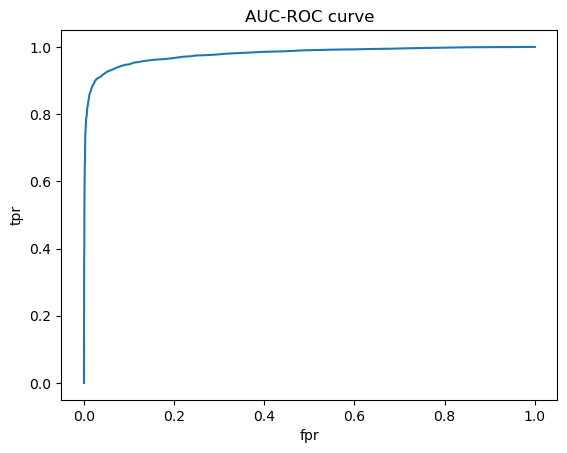

In [96]:
plt.plot(fpr,tpr)
plt.title("AUC-ROC curve")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [97]:
import joblib
joblib.dump(dt,'dt.pkl')

['dt.pkl']

In [98]:
model = joblib.load('dt.pkl')

In [99]:
data2.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,model,is_claim
0,0.975712,0.07,0.384615,93.776330,7,1
1,0.509869,0.10,0.576923,270.979704,5,0
2,1.100863,0.07,0.432692,73.552702,7,0
3,0.793827,0.06,0.721154,93.776330,7,0
4,0.012367,0.01,0.403846,186.381330,7,0


In [100]:
model.predict([[0.97512,0.07,0.38,93.776330,7]])

array([1], dtype=int64)

In [101]:
model.predict([[0.012367,0.01,0.40,186.381330,7]])

array([0], dtype=int64)

#  Chi square test

In [102]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [103]:
chiTest=SelectKBest(score_func=chi2,k="all")

In [104]:
c=chiTest.fit(sm_data.iloc[:,:-1],sm_data.iloc[:,-1])

In [105]:
chi=pd.DataFrame({"feature":list(c.scores_),"col":list(sm_data.iloc[:,:-1].columns)})
chi

,feature,col
0,564.032972,policy_tenure
1,17.601321,age_of_car
2,2.107796,age_of_policyholder
3,130.227192,area_cluster
4,1808.318354,population_density
5,1.545576,make
6,3.482703,segment
7,49.151071,model
8,9.927673,fuel_type
9,152.309331,max_torque


In [106]:
m1=chi[chi["feature"]>=12]
print(m1["col"].to_string(index=False))
len(m1["col"])

         policy_tenure
            age_of_car
          area_cluster
    population_density
                 model
            max_torque
             max_power
is_adjustable_steering
          displacement
         steering_type
                length
                 width
          gross_weight
   is_front_fog_lights


14

In [107]:
m1 

,feature,col
0,564.032972,policy_tenure
1,17.601321,age_of_car
3,130.227192,area_cluster
4,1808.318354,population_density
7,49.151071,model
9,152.309331,max_torque
10,23.767400,max_power
14,20.426219,is_adjustable_steering
19,1223.342037,displacement
23,34.878821,steering_type


In [108]:
m1=sm_data[["policy_tenure","age_of_car","area_cluster","population_density","model","max_torque","max_power","is_adjustable_steering","displacement","steering_type","length","width","gross_weight","is_front_fog_lights","is_claim"]]

In [109]:
# data3=sm_data[m1["col"]]
# data3=pd.concat([data3,sm_data["is_claim"]],axis=1)
data3=m1

In [110]:
data3.head()

,policy_tenure,age_of_car,area_cluster,population_density,model,max_torque,max_power,is_adjustable_steering,displacement,steering_type,length,width,gross_weight,is_front_fog_lights,is_claim
0,0.975712,0.07,20,93.776330,7,0,6,1,1197,0,3845.0,1735.0,1335.0,1,1
1,0.509869,0.10,1,270.979704,5,4,0,1,1493,2,4300.0,1790.0,1720.0,1,0
2,1.100863,0.07,4,73.552702,7,0,6,1,1197,0,3845.0,1735.0,1335.0,1,0
3,0.793827,0.06,20,93.776330,7,0,6,1,1197,0,3845.0,1735.0,1335.0,1,0
4,0.012367,0.01,17,186.381330,7,0,6,1,1197,0,3845.0,1735.0,1335.0,1,0


In [111]:
data3["is_claim"].value_counts()

1    38427
0    38427
Name: is_claim, dtype: int64

In [112]:
data3.shape

(76854, 15)

In [113]:
c1=data3.iloc[:,:-1]
c2=data3.iloc[:,-1]

In [114]:
xt5,xte5,yt5,yte5=train_test_split(c1,c2,test_size=0.2)
xt5.shape,xte5.shape,yt5.shape,yte5.shape

((61483, 14), (15371, 14), (61483,), (15371,))

In [115]:
l=[lg,dt,rf,knn,nb,xgb]
l1=[]
f1=[]
precision=[]
recall=[]
for i in l:
    i.fit(xt5,yt5)
    print(i.__class__.__name__)
    pre=i.predict(xte5)
    cff1=confusion_matrix(yte5,pre)
    print(cff1)
    acc1=cff1.diagonal().sum()/cff1.sum()*100
    print(acc1)
    precision.append(precision_score(yte5,pre))
    recall.append(recall_score(yte5,pre))
    print()
    print(classification_report(yte5,pre))
    l1.append(acc1)
    f1score=f1_score(yte5,pre)
    f1.append(f1score)

LogisticRegression
[[4160 3508]
 [3236 4467]]
56.125170776136876

              precision    recall  f1-score   support

           0       0.56      0.54      0.55      7668
           1       0.56      0.58      0.57      7703

    accuracy                           0.56     15371
   macro avg       0.56      0.56      0.56     15371
weighted avg       0.56      0.56      0.56     15371

DecisionTreeClassifier
[[6880  788]
 [ 762 6941]]
89.91607572701841

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7668
           1       0.90      0.90      0.90      7703

    accuracy                           0.90     15371
   macro avg       0.90      0.90      0.90     15371
weighted avg       0.90      0.90      0.90     15371

RandomForestClassifier
[[6586 1082]
 [1151 6552]]
85.47264328931105

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      7668
           1       0.86      0.85

In [116]:
algo=["logistic","decision tree","Random Forest","KNN","Naive Bayes","XGB"]
basic=pd.DataFrame({"Algorithm":algo,"Accuracy":l1,"F1-score":f1,"Precision":precision,"Recall":recall})
basic

,Algorithm,Accuracy,F1-score,Precision,Recall
0,logistic,56.125171,0.569843,0.560125,0.579904
1,decision tree,89.916076,0.899559,0.898046,0.901078
2,Random Forest,85.472643,0.854404,0.858266,0.850578
3,KNN,74.172142,0.757956,0.714565,0.806958
4,Naive Bayes,51.063691,0.539939,0.510466,0.573023
5,XGB,88.341682,0.874545,0.949096,0.810853


In [117]:
pre=xgb.predict(xte5)

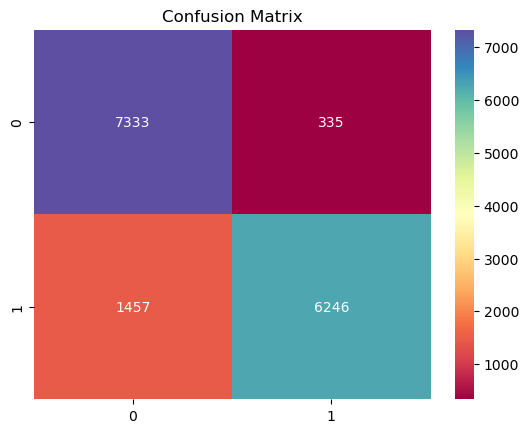

In [118]:
cm=confusion_matrix(yte5,pre)
sns.heatmap(cm,annot=True,fmt="d",cmap="Spectral")
plt.title("Confusion Matrix")
plt.show()

# AUC ROC CURVE

In [119]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [120]:
# rf.fit(xt4,yt4)
pre=xgb.predict(xte5)

In [121]:
roc=roc_auc_score(yte5,pre)
roc

0.8835824300987407

In [122]:
m=xgb.predict_proba(xte5)
m

array([[0.9846987 , 0.01530131],
       [0.54695976, 0.45304027],
       [0.4814673 , 0.5185327 ],
       ...,
       [0.7173457 , 0.2826543 ],
       [0.96256006, 0.03743997],
       [0.7675981 , 0.2324019 ]], dtype=float32)

In [123]:
fpr,tpr,threshold=roc_curve(yte5,xgb.predict_proba(xte5)[:,1])
# fpr,tpr,threshold=roc_curve(yte4,m[:,1])
# fpr,tpr,threshold=roc_curve(yte4,pre)

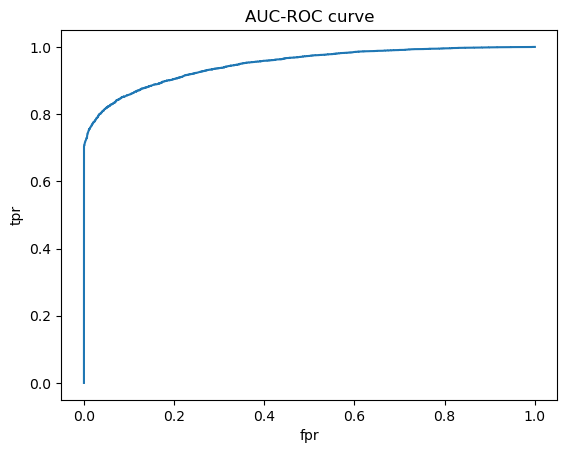

In [124]:
plt.plot(fpr,tpr)
plt.title("AUC-ROC curve")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [125]:
# import joblib
# joblib.dump(xgb,'xgb2.pkl')

In [126]:
data3.to_csv("feature.csv")

In [127]:
data3.head()

,policy_tenure,age_of_car,area_cluster,population_density,model,max_torque,max_power,is_adjustable_steering,displacement,steering_type,length,width,gross_weight,is_front_fog_lights,is_claim
0,0.975712,0.07,20,93.776330,7,0,6,1,1197,0,3845.0,1735.0,1335.0,1,1
1,0.509869,0.10,1,270.979704,5,4,0,1,1493,2,4300.0,1790.0,1720.0,1,0
2,1.100863,0.07,4,73.552702,7,0,6,1,1197,0,3845.0,1735.0,1335.0,1,0
3,0.793827,0.06,20,93.776330,7,0,6,1,1197,0,3845.0,1735.0,1335.0,1,0
4,0.012367,0.01,17,186.381330,7,0,6,1,1197,0,3845.0,1735.0,1335.0,1,0


In [128]:
model = joblib.load('xgb2.pkl')

In [129]:
model.predict([[0.50,0.10,1,270.979704,5,4,0,1,1493,2,4300,1790,1720,1]])

array([0])

# Adding noise to test data

In [130]:
# data["is_claim"].value_counts()

In [131]:
# import pandas as pd

# # Assuming df is your DataFrame
# # Check the current value counts
# value_counts = df["is_claim"].value_counts()
# print("Current Value Counts:")
# print(value_counts)

# # Increase the count of '1' by a specified amount (e.g., by 100)
# increase_amount = 100
# rows_to_increase = 1  # The value '1'

# # Identify the rows with '1' and increase their count
# rows_with_one = df[df["is_claim"] == rows_to_increase].sample(increase_amount, replace=True)
# df = pd.concat([df, rows_with_one], axis=0)

# # Check the updated value counts
# updated_value_counts = df["is_claim"].value_counts()
# print("\nUpdated Value Counts:")
# print(updated_value_counts)


In [132]:
# data["is_claim"].value_counts()

In [133]:
# amount = 54844
# percentage = 0.10 # 10 percent as a decimal

# result = amount * percentage

# print(int(result))
# a=10
# b=7.5
# w=(b/a)
# w#2 percentage of 10(part/whole)*100

In [134]:
# # using xgb classifier
# xn=data.iloc[:,:-1]
# yn=data.iloc[:,-1]

In [135]:
# xt2,xte2,yt2,yte2=train_test_split(xo,yo,test_size=0.2)
# xt2.shape,xte2.shape,yt2.shape,yte2.shape

In [136]:
# xgb.fit(xt2,yt2)
# xgb_p=xgb.predict(xte2)
# xgb_cf=confusion_matrix(yte2,xgb_p)
# print(xgb_cf)
# xgb_ac=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
# print(xgb_ac)
# print(accuracy_score(yte2,xgb_p))

In [137]:
# dt_ac=dt_c.diagonal().sum()/dt_c.sum()*100
# dt_ac